In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.gam.api import GLMGam, BSplines

In [2]:
# example of train data having 2 inputs
np.random.seed(123)                                                 # for reproducibility
n = 100                                                             # Number of data points
x1 = np.random.uniform(-1, 1, size=n)                               # input 1
x2 = np.random.uniform(-1, 1, size=n)                               # input 2
y = 1 + x1**4 + x2**2 + x1*x2 + np.random.normal(scale=0.1, size=n) # output

df_data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})                # create data frame

In [3]:
# basis splines, the bigger number of knots is, the more complex model is
bs = BSplines(df_data[['x1', 'x2']], df=[20, 30], degree=[4, 5], include_intercept=True)

# fit the model
model = GLMGam.from_formula('y ~ x1 + x2 + x1*x2', data=df_data, smoother=bs).fit()

In [4]:
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                         GLMGam   Df Residuals:                    50.00
Model Family:                Gaussian   Df Model:                        49.00
Link Function:               Identity   Scale:                        0.010303
Method:                         PIRLS   Log-Likelihood:                 121.53
Date:                Sat, 08 Jun 2024   Deviance:                      0.51513
Time:                        02:13:14   Pearson chi2:                    0.515
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5258      0.037     41.766      0.0

In [5]:
# Predict y wrt new input
x1_new = np.random.uniform(-1, 1, size=17)
x2_new = np.random.uniform(-1, 1, size=17)
df_new = pd.DataFrame({'x1': x1_new, 'x2': x1_new})
pred_y = model.predict(df_new, df_new)

In [6]:
def plot(x_train, y_train, x_test, y_test):
    # Create the scatter plot
    plt.scatter(x_train, y_train, color='blue', label='Original Data')
    plt.scatter(x_test,  y_test, color='red',   label='Predicted Data')

    # Add labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    # Show the plot
    plt.show()

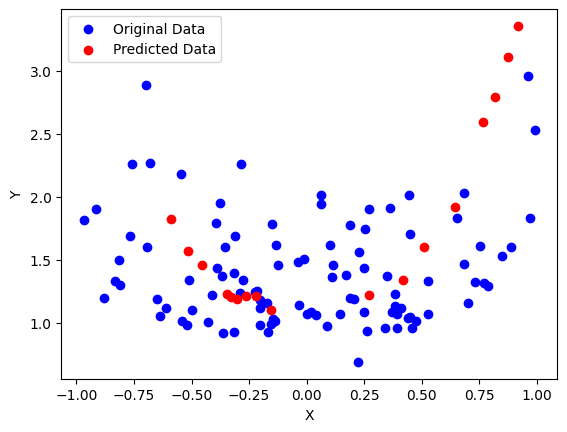

In [7]:
# Scatter plot of real y vs predicted y with respect to x1
plot(x1, y, x1_new, pred_y)

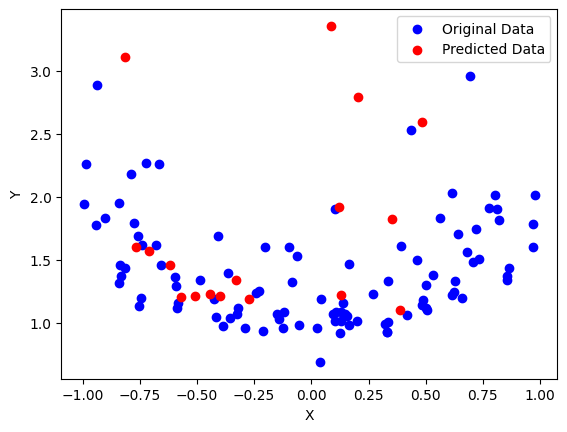

In [8]:
# Scatter plot of real y vs predicted y with respect to x2
plot(x2, y, x2_new, pred_y)